In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
passmark=40 #minimum passing marks

In [33]:
import os
path=os.getcwd()+'\StudentsPerformance.csv'
raw_data=pd.read_csv(path)
raw_data.head()

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


In [21]:
print(raw_data.shape)

(1000, 4)


In [22]:
raw_data.describe

<bound method NDFrame.describe of      gender  math score  reading score  writing score
0    female          72             72             74
1    female          69             90             88
2    female          90             95             93
3      male          47             57             44
4      male          76             78             75
5    female          71             83             78
6    female          88             95             92
7      male          40             43             39
8      male          64             64             67
9    female          38             60             50
10     male          58             54             52
11     male          40             52             43
12   female          65             81             73
13     male          78             72             70
14   female          50             53             58
15   female          69             75             78
16     male          88             89          

In [23]:
raw_data.isnull().sum()

gender           0
math score       0
reading score    0
writing score    0
dtype: int64

In [24]:
raw_data['Math_PassStatus'] = np.where(raw_data['math score']<passmark, 'F', 'P')
raw_data.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

In [25]:
raw_data['Reading_PassStatus'] = np.where(raw_data['reading score']<passmark, 'F', 'P')
raw_data.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

In [26]:
raw_data['Writing_PassStatus'] = np.where(raw_data['writing score']<passmark, 'F', 'P')
raw_data.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

In [27]:
raw_data['OverAll_PassStatus'] = raw_data.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

raw_data.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

In [28]:
raw_data['Total_Marks'] = raw_data['math score']+raw_data['reading score']+raw_data['writing score']
raw_data['Percentage'] = raw_data['Total_Marks']/3

In [29]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

raw_data['Grade'] = raw_data.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

raw_data.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

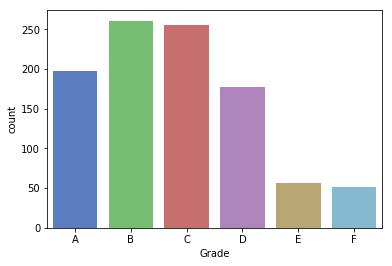

In [30]:
sns.countplot(x="Grade", data = raw_data, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()